In [25]:
import numpy as np
import pandas as pd
#!pip install scikit-learn
import matplotlib.pyplot as plt
from tabulate import tabulate

In [26]:
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
# METRIC
class Metric:
  def __init__(self, y_pred, y_test):
    self.y_pred = y_pred
    self.y_test = y_test

  def accuracy(self):
    data_len= len(self.y_pred)
    correct=0
    # print(y_test_len)
    # print("y_pred",self.y_pred.shape)
    # print("y_test",self.y_test.shape)
    for i in range(data_len):
      if self.y_pred[i]==self.y_test[i]:
        correct+=1
    acc= correct/data_len
    print(f"Accuracy of {round(acc*100,3)}%")
    return acc

  def confusion_matrix(self):
    self.true_negative=0
    self.true_positive=0
    self.false_negative=0
    self.false_positive=0
    for i in range(len(self.y_pred)):
      if self.y_test[i]==0:
        if self.y_pred[i]==0:
            self.true_negative+=1
        else:
            self.false_positive+=1
      else:
        if self.y_test[i]==0:
            self.false_negative+=1
        else:
            self.true_positive+=1
    final_CovMatrix= np.array([[self.true_negative,self.false_positive],[self.false_negative,self.true_positive]])
    print("Confusion Matrix")
    print(final_CovMatrix)
    plt.figure(figsize=(5,5))
    plt.imshow(final_CovMatrix, cmap='Blues')
    plt.show()
    return

  def multi_class_confusion_matrix(self):
    unique_classes= np.unique(self.y_test)
    num_classes= len(unique_classes)
    confusion_matrix= np.zeros((num_classes,num_classes),dtype=int)
    for i in range(len(self.y_pred)):
      row_index = np.where(unique_classes == self.y_pred[i])[0][0]
      col_index = np.where(unique_classes == self.y_test[i])[0][0]
      confusion_matrix[row_index, col_index] += 1
    # plt.imshow(confusion_matrix)
    self.cm=confusion_matrix
    return confusion_matrix


  def display_confusion_matrix_table(self):
    # Check if cm is a valid confusion matrix
    cm=self.cm
    if cm.shape[0] != cm.shape[1]:
        raise ValueError("Confusion matrix must be square!")

    # Defining the headers for the table
    headers = ["Actual Class", "Class 0", "Class 1"]

    # Prepare data rows with appropriate labels
    data = [["Predicted Class 0", cm[0, 0], cm[0, 1]],
            ["Predicted Class 1", cm[1, 0], cm[1, 1]]]

    # Print the table using tabulate
    table = tabulate(data, headers=headers, tablefmt="grid")

    # Display the formatted table
    print(table)

  def plot_confusion_matrix(self,datatype):
    cm = self.cm
    class_names=np.unique(self.y_test)
    # Check if cm is a valid confusion matrix
    if cm.shape[0] != cm.shape[1]:
        raise ValueError("Confusion matrix must be square!")
    # Create a figure with specified size
    plt.figure(figsize=(8, 6))

    # Create a heatmap using seaborn
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=class_names, yticklabels=class_names, linewidths=1, linecolor='black')

    # Add labels and title
    plt.title(f'Confusion Matrix for {datatype}', fontsize=18)
    plt.xlabel('Predicted Label', fontsize=14)
    plt.ylabel('True Label', fontsize=14)

    # Display the confusion matrix
    plt.show()



  def f1_score(self):
    precision = self.true_positive / (self.true_positive + self.false_positive)
    recall = self.true_positive / (self.true_positive + self.false_negative)
    f1 = 2 * ((precision * recall) / (precision + recall))
    print(f"F1 Score: {f1:.2f}")
    return f1

  def multi_class_f1_Score(self,confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    precision = np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1_score = np.zeros(num_classes)

    for i in range(num_classes):
        true_positive = confusion_matrix[i, i]
        false_positive = np.sum(confusion_matrix[:, i]) - true_positive
        false_negative = np.sum(confusion_matrix[i, :]) - true_positive

        precision[i] = true_positive / (true_positive + false_positive)
        recall[i] = true_positive / (true_positive + false_negative)

        f1_score[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i])

    return f1_score

  def roc_curve(self, predicted_scores):
    tpr_values = []
    fpr_values = []

    thresholds = sorted(set(predicted_scores), reverse=True)

    total_positives = sum(self.y_test)
    total_negatives = len(self.y_test) - total_positives

    tp = 0
    fp = 0

    for threshold in thresholds:
        predictions = [1 if score >= threshold else 0 for score in predicted_scores]

        tp = sum(1 for p, actual in zip(predictions, self.y_test) if p == 1 and actual == 1)
        fp = sum(1 for p, actual in zip(predictions, self.y_test) if p == 1 and actual == 0)
        tpr = tp / total_positives
        fpr = fp / total_negatives

        tpr_values.append(tpr)
        fpr_values.append(fpr)

    plt.plot(fpr_values, tpr_values, marker='o', linestyle='-')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.grid(True)
    plt.show

  def multi_class_roc(self,probabilities):
    tpr_values = []
    fpr_values = []

    thresholds = sorted(set(probabilities), reverse=True)

    total_positives = sum(self.y_test)
    total_negatives = len(self.y_test) - total_positives

    for threshold in thresholds:
        predictions = [1 if score >= threshold else 0 for score in probabilities]

        tp = sum(1 for p, actual in zip(predictions, self.y_test) if p == 1 and actual == 1)
        fp = sum(1 for p, actual in zip(predictions, self.y_test) if p == 1 and actual == 0)
        tpr = tp / total_positives
        fpr = fp / total_negatives

        tpr_values.append(tpr)
        fpr_values.append(fpr)

    plt.plot(fpr_values, tpr_values, marker='o', linestyle='-')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.grid(True)
    plt.show()


# KNN

In [27]:
class KNN:
  def __init__(self,k, metric="euclidean"):
    self.k=k
    self.metric=metric

  def euclidean(self, x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

  def manhattan(self, x1, x2):
    return np.sum(np.abs(x1 - x2))

  def cosine_distance(self, x1, x2):
    return 1 - np.dot(x1, x2) / (np.linalg.norm(x1) * np.linalg.norm(x2))

  def calculate_distance(self, x1, x2):
    if self.metric == "euclidean":
      return self.euclidean(x1, x2)
    elif self.metric == "manhattan":
      return self.manhattan(x1, x2)
    elif self.metric == "cosine":
      return self.cosine_distance(x1, x2)
    else:
      raise ValueError("Invalid distance metric")

  def train(self, X, y):
    self.X_train = X
    self.y_train = y

  def predict(self, X_test):
    Predictions=[]
    for x in X_test:
      distances = [self.calculate_distance(x, x_train) for x_train in self.X_train]
      #after sorting taking the last k point
      # argsort returns the indices after the sorting list
      k_indices = np.argsort(distances)[:self.k]
      k_nearest_labels = [self.y_train[i] for i in k_indices]
      #bincount count no. of ele i in list, and return the count list where at index i is the count(i)
      # and then taking max among all the cls
      pred_cls = np.bincount(k_nearest_labels).argmax()
      #modification needed if two classes have samen value return the avg distance

      Predictions.append(pred_cls)
    return np.array(Predictions)

  # Function to plot decision boundaries
  def plot_decision_boundaries(self,X_train, y_train, resolution=0.02):
      x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
      y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
      xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                          np.arange(y_min, y_max, resolution))
      title=f"KNN Decision Boundaries (K={self.k})"
      # Predict for each point in the grid
      Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
      Z = Z.reshape(xx.shape)

      # Plot the decision boundary and training points
      plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
      plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.coolwarm, edgecolors='k')
      plt.title(f"KNN Decision Boundaries (K={self.k})")
      plt.show()



In [88]:
train_data=pd.read_csv('Team14/Dataset-1/test.csv')
test=pd.read_csv('Team14/Dataset-1/train.csv')

X_train=train_data.iloc[:,:-1].values
y_train=train_data.iloc[:,-1].values
X_test=test.iloc[:,:-1].values
y_test=test.iloc[:,-1].values

In [89]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 2)
(120,)
(840, 2)
(840,)


Accuracy of 98.333%


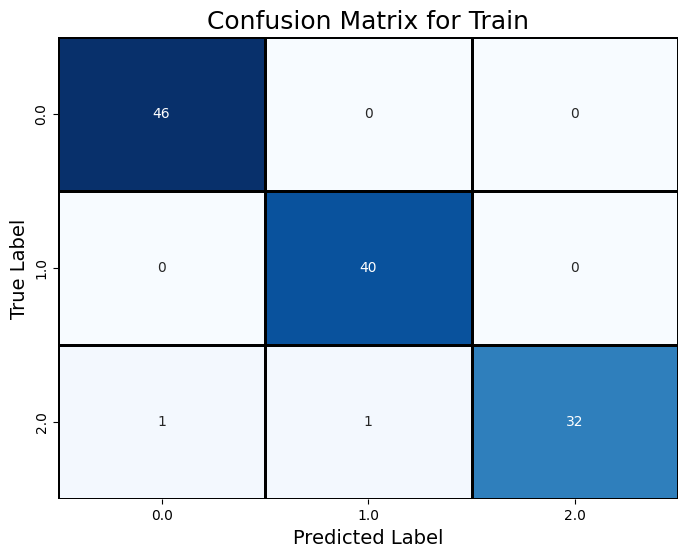

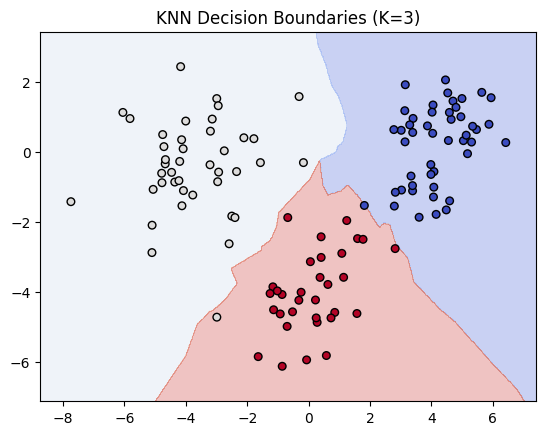

In [30]:
values_for_k=[1,3,7,10]
distance_metrics=["euclidean","cosine"]
# for k=5  and euclidean distance
knn_model_1=KNN(values_for_k[1],metric=distance_metrics[0])
knn_model_1.train(X_train,y_train)
knn_prediction=knn_model_1.predict(X_train)

knn_metric= Metric(knn_prediction, y_train)
knn_metric.accuracy()
knn_metric.multi_class_confusion_matrix()
# knn_metric.display_confusion_matrix_table()
knn_metric.plot_confusion_matrix("Train")
knn_model_1.plot_decision_boundaries(X_train,y_train)

Accuracy of 98.333%


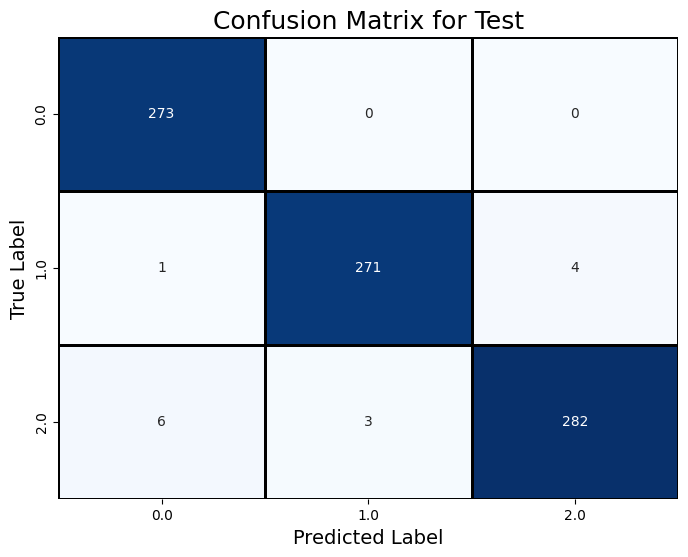

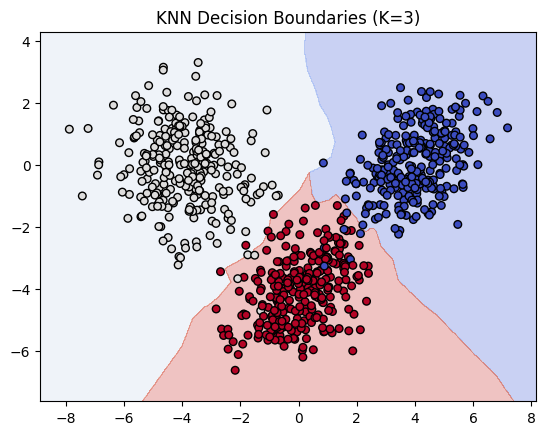

In [31]:
values_for_k=[1,3,7,10]
distance_metrics=["euclidean","cosine"]
# for k=5  and euclidean distance
knn_model_1=KNN(values_for_k[1],metric=distance_metrics[0])
knn_model_1.train(X_train,y_train)
knn_prediction=knn_model_1.predict(X_test)

knn_metric= Metric(knn_prediction, y_test)
knn_metric.accuracy()
knn_metric.multi_class_confusion_matrix()
# knn_metric.display_confusion_matrix_table()
knn_metric.plot_confusion_matrix("Test")
knn_model_1.plot_decision_boundaries(X_test,y_test)


## For dataset 2

In [32]:
train_data=pd.read_csv("Team14/Dataset-2/Train.csv")
test=pd.read_csv("Team14/Dataset-2/Test.csv")

X_train=train_data.iloc[:,:-1].values
y_train=train_data.iloc[:,-1].values
X_test=test.iloc[:,:-1].values
y_test=test.iloc[:,-1].values

Accuracy of 100.0%


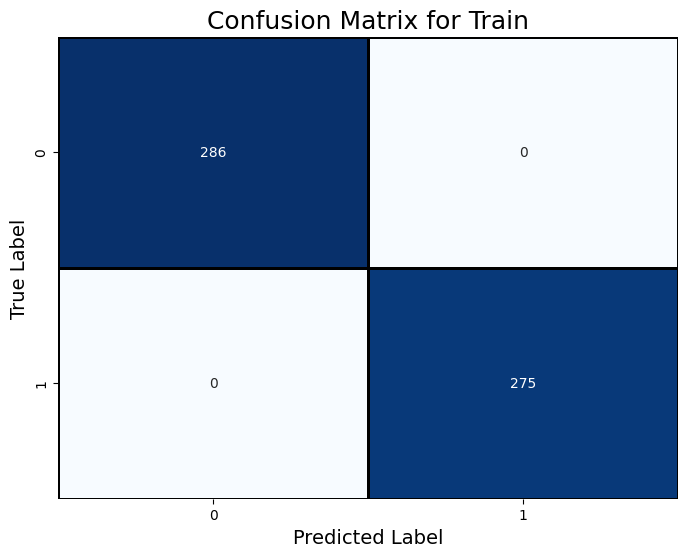

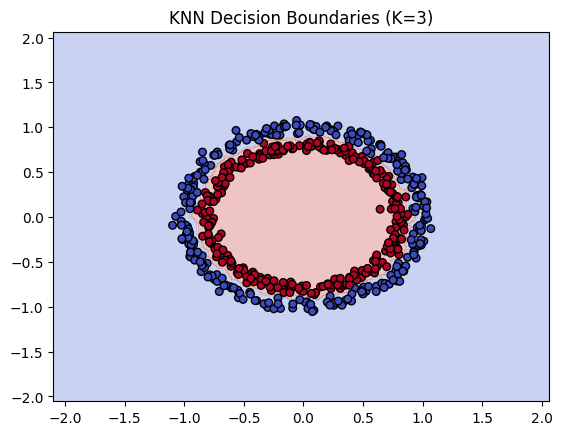

In [33]:
values_for_k=[1,3,7,10]
distance_metrics=["euclidean","cosine"]
# for k=5  and euclidean distance
knn_model_1=KNN(values_for_k[1],metric=distance_metrics[0])
knn_model_1.train(X_train,y_train)
knn_prediction=knn_model_1.predict(X_train)

knn_metric= Metric(knn_prediction, y_train)
knn_metric.accuracy()
knn_metric.multi_class_confusion_matrix()
# knn_metric.display_confusion_matrix_table()
knn_metric.plot_confusion_matrix("Train")
knn_model_1.plot_decision_boundaries(X_train,y_train)

In [34]:
# # Function to plot decision regions
# def plot_decision_regions(X, y, classifier, with_level_curves=True, resolution=0.02, title="Decision Region Plot"):
#     # Define bounds of the plot
#     x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
#                          np.arange(y_min, y_max, resolution))

#     # Predict for each point in the meshgrid
#     Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)

#     # Plot decision region
#     plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

#     # Plot training data points
#     markers = ('o', 's', '^')
#     colors = ('blue', 'red', 'green')
#     for idx, cl in enumerate(np.unique(y)):
#         plt.scatter(x=X[y == cl, 0],
#                     y=X[y == cl, 1],
#                     alpha=0.8,
#                     c=colors[idx],
#                     marker=markers[idx],
#                     label=f'Class {cl}')

#     if with_level_curves:
#         # Plot level curves (Gaussian distribution contours for each class)
#         for cls in classifier.classes:
#             mean = classifier.means[cls]
#             cov = classifier.covs[cls] if hasattr(classifier, 'covs') else np.diag(classifier.vars[cls])
#             rv = multivariate_normal(mean, cov)
#             plt.contour(xx, yy, rv.pdf(np.dstack((xx, yy))), levels=5, colors=colors[int(cls)], alpha=0.8)

#     plt.title(title)
#     plt.legend()
#     plt.show()

Accuracy of 100.0%


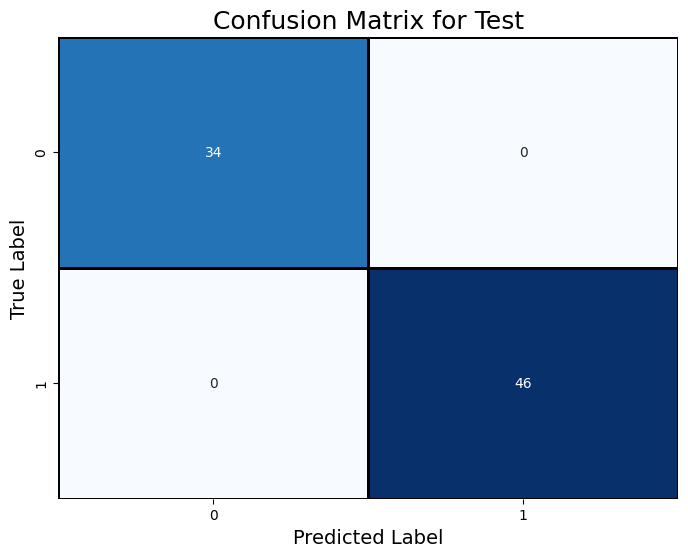

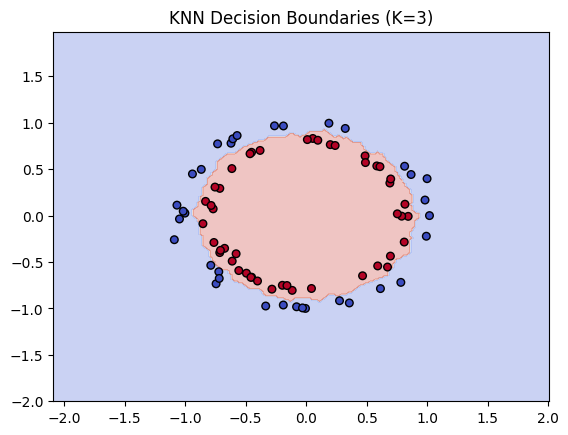

In [35]:
values_for_k=[1,3,7,10]
distance_metrics=["euclidean","cosine"]
# for k=5  and euclidean distance
knn_model_1=KNN(values_for_k[1],metric=distance_metrics[0])
knn_model_1.train(X_train,y_train)
knn_prediction=knn_model_1.predict(X_test)

knn_metric= Metric(knn_prediction, y_test)
knn_metric.accuracy()
knn_metric.multi_class_confusion_matrix()
# knn_metric.display_confusion_matrix_table()
knn_metric.plot_confusion_matrix("Test")
knn_model_1.plot_decision_boundaries(X_test,y_test)

## data  set 3

In [36]:
X_train=pd.read_csv("Team14/Dataset-3/train_data.csv")
y_train=pd.read_csv("Team14/Dataset-3/train_label.csv")
X_test=pd.read_csv("Team14/Dataset-3/test_data.csv")
y_test=pd.read_csv("Team14/Dataset-3/test_label.csv")

X_train=X_train.iloc[:,:].values
y_train=y_train.iloc[:,0].values
X_test=X_test.iloc[:,:].values
y_test=y_test.iloc[:,0].values

In [37]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2099, 36)
(2099,)
(599, 36)
(599,)


Accuracy of 70.129%


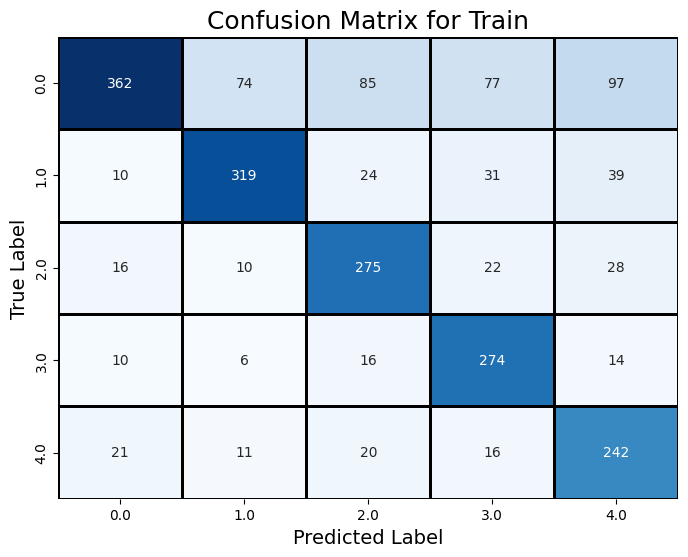

In [38]:
values_for_k=[1,3,7,10]
distance_metrics=["euclidean","cosine"]
# for k=5  and euclidean distance
knn_model_1=KNN(values_for_k[1],metric=distance_metrics[0])
knn_model_1.train(X_train,y_train)
knn_prediction=knn_model_1.predict(X_train)

knn_metric= Metric(knn_prediction, y_train)
knn_metric.accuracy()
knn_metric.multi_class_confusion_matrix()
# knn_metric.display_confusion_matrix_table()
knn_metric.plot_confusion_matrix("Train")

Accuracy of 43.573%


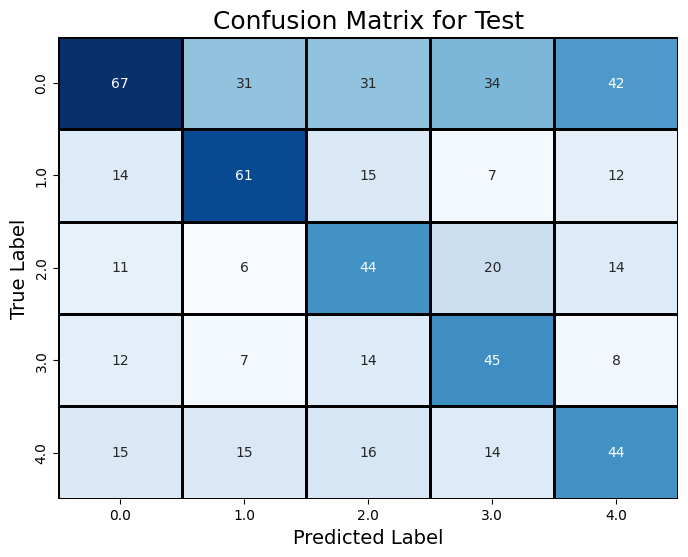

In [40]:
values_for_k=[1,3,7,10]
distance_metrics=["euclidean","cosine"]
# for k=5  and euclidean distance
knn_model_1=KNN(values_for_k[1],metric=distance_metrics[0])
knn_model_1.train(X_train,y_train)
knn_prediction=knn_model_1.predict(X_test)

knn_metric= Metric(knn_prediction, y_test)
knn_metric.accuracy()
knn_metric.multi_class_confusion_matrix()
# knn_metric.display_confusion_matrix_table()
knn_metric.plot_confusion_matrix("Test")


# KNR

In [41]:
train_data=pd.read_csv("Team14/Dataset-1/train.csv")
test=pd.read_csv("Team14/Dataset-1/test.csv")

X_train=train_data.iloc[:,:-1].values
y_train=train_data.iloc[:,-1].values
X_test=test.iloc[:,:-1].values
y_test=test.iloc[:,-1].values

In [42]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
class KNRClassifier:
    def __init__(self, m, max_iters=100, tol=1e-4, distance_metric='euclidean'):
        self.m = m  # Number of representatives per class
        self.max_iters = max_iters  # Maximum iterations for K-means
        self.tol = tol  # Tolerance to stop K-means
        self.distance_metric = distance_metric
        self.centroids = []  # List to store centroids
        self.labels = []  # List to store class labels of centroids

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def initialize_centroids(self, X, K):
        """ Randomly initialize K centroids from the dataset X """
        indices = np.random.choice(len(X), K, replace=False)
        return X[indices]

    def assign_clusters(self, X, centroids):
        """ Assign each point in X to the nearest centroid """
        clusters = [[] for _ in range(len(centroids))]
        for idx, x in enumerate(X):
            distances = [self.euclidean_distance(x, centroid) for centroid in centroids]
            nearest_idx = np.argmin(distances)
            clusters[nearest_idx].append(idx)
        return clusters

    def update_centroids(self, X, clusters):
        """ Update the centroids as the mean of the points in each cluster """
        new_centroids = []
        for cluster in clusters:
            if cluster:
                new_centroid = np.mean(X[cluster], axis=0)
                new_centroids.append(new_centroid)
            else:
                new_centroids.append(np.zeros(X.shape[1]))
        return np.array(new_centroids)

    def kmeans(self, X, K):
        """ Custom K-means clustering algorithm """
        #start with getting
        centroids = self.initialize_centroids(X, K)

        for _ in range(self.max_iters):
            # Assign clusters based on current centroids
            clusters = self.assign_clusters(X, centroids)

            # Store previous centroids to check for convergence
            old_centroids = centroids.copy()

            # Update centroids
            centroids = self.update_centroids(X, clusters)

            # Check for convergence (if the centroids don't change much)
            if np.all(np.abs(centroids - old_centroids) < self.tol):
                break

        return centroids

    def train(self, X_train, y_train):
        """
        Train the KNR classifier by generating m representatives per class.
        :param X_train: Training data features
        :param y_train: Corresponding labels of the training data
        """
        self.centroids = []
        self.labels = []

        unique_classes = np.unique(y_train)

        for cls in unique_classes:
            # Filter data for the current class
            X_class = X_train[y_train == cls]

            # Apply custom K-means clustering for the current class
            centroids = self.kmeans(X_class, self.m)

            # Store the centroids and their corresponding class label
            self.centroids.append(centroids)
            self.labels.extend([cls] * self.m)

        # Convert centroids to a 2D array
        self.centroids = np.vstack(self.centroids)

    def predict(self, X_test):
        """
        Predict class labels for the test data based on closest representative.
        :param X_test: Test data features
        :return: Predicted class labels
        """
        predictions = []

        # Compute distance between each test point and all centroids
        for x in X_test:
            distances = [self.euclidean_distance(x, centroid) for centroid in self.centroids]

            # Find the closest centroid
            closest_idx = np.argmin(distances)
            predictions.append(self.labels[closest_idx])

        return np.array(predictions)

    # Function to plot decision boundaries
    def plot_decision_boundaries(self,X_train, y_train, resolution=0.02):
        x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
        y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                            np.arange(y_min, y_max, resolution))

        # Predict for each point in the grid
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Create custom colormap
        cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA', '#FFFFAA', '#FFCCAA'])
        cmap_bold = ListedColormap(['#FF0000', '#0000FF', '#00FF00', '#FFFF00', '#FF00FF'])

        # Plot the decision boundary and training points
        plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=cmap_bold, edgecolors='k')
        plt.title(f"KNR Decision Boundaries with {self.m} Representatives per Class")
        plt.show()


Accuracy of 98.81%


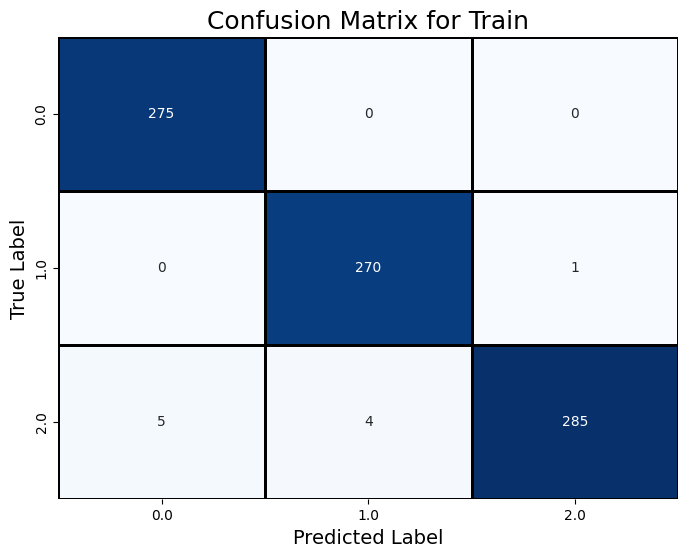

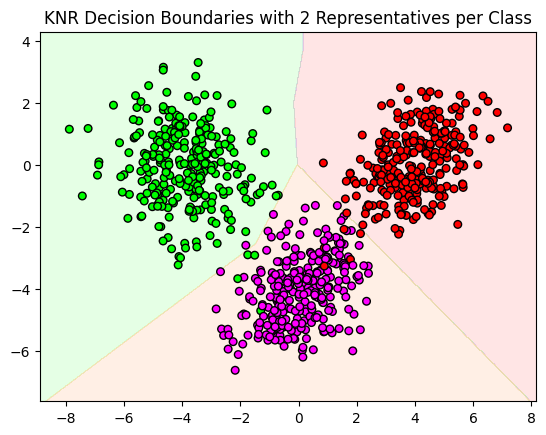

In [43]:


# KNR with 2 representatives per class
knr = KNRClassifier(m=2)
knr.train(X_train, y_train)
knr_prediction = knr.predict(X_train)

knr__metric= Metric(knr_prediction, y_train)
knr__metric.accuracy()
knr__metric.multi_class_confusion_matrix()
# knr__metric.display_confusion_matrix_table()
knr__metric.plot_confusion_matrix("Train")
knr.plot_decision_boundaries(X_train,y_train)


# knr__metric.multi_class_f1_Score(knr__metric.multi_class_confusion_matrix())

Accuracy of 98.333%


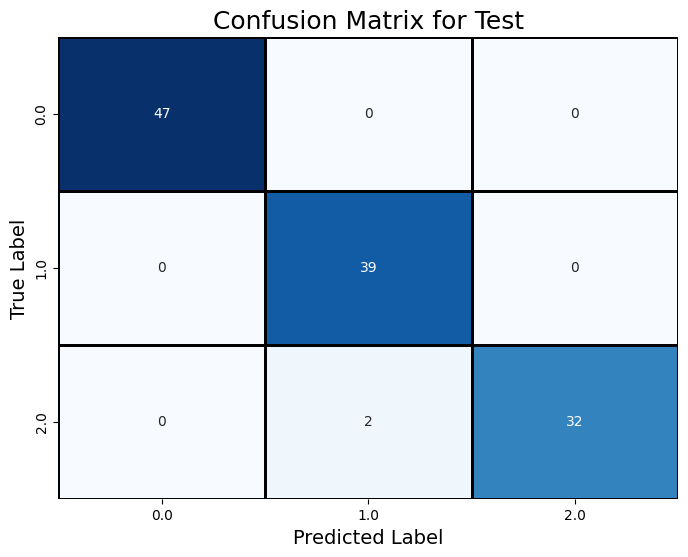

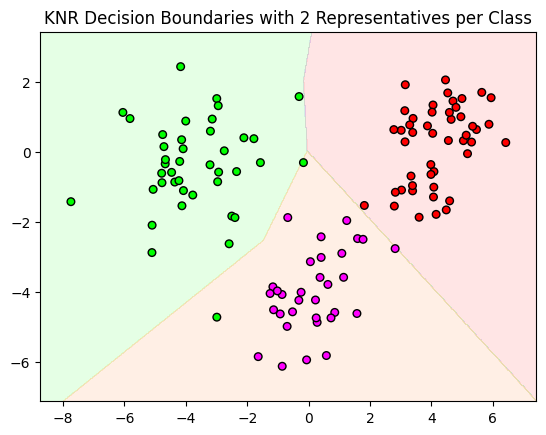

In [44]:


# KNR with 2 representatives per class
knr = KNRClassifier(m=2)
knr.train(X_train, y_train)
knr_prediction = knr.predict(X_test)

knr__metric= Metric(knr_prediction, y_test)
knr__metric.accuracy()
knr__metric.multi_class_confusion_matrix()
# knr__metric.display_confusion_matrix_table()
knr__metric.plot_confusion_matrix("Test")
knr.plot_decision_boundaries(X_test,y_test)

# knr__metric.multi_class_f1_Score(knr__metric.multi_class_confusion_matrix())

## dataset 2

In [45]:
train_data=pd.read_csv("Team14/Dataset-2/Train.csv")
test=pd.read_csv("Team14/Dataset-2/Test.csv")

X_train=train_data.iloc[:,:-1].values
y_train=train_data.iloc[:,-1].values
X_test=test.iloc[:,:-1].values
y_test=test.iloc[:,-1].values

Accuracy of 52.763%


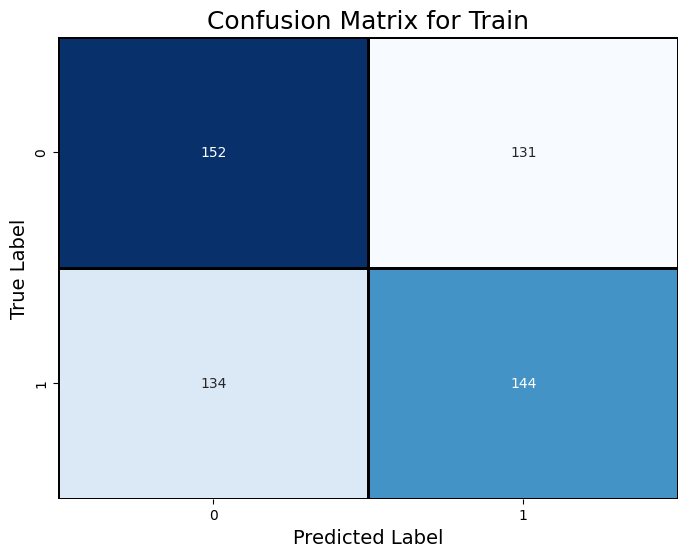

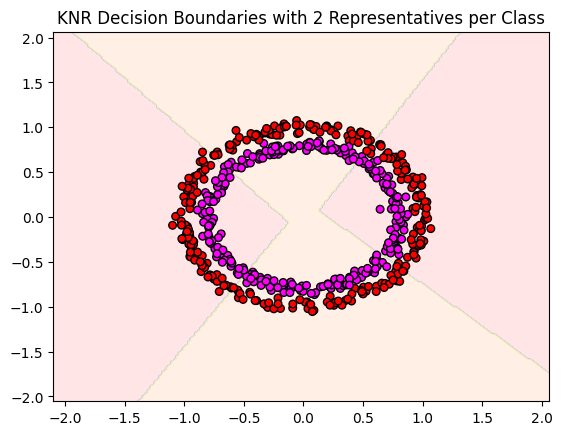

In [46]:


# KNR with 2 representatives per class
knr = KNRClassifier(m=2)
knr.train(X_train, y_train)
knr_prediction = knr.predict(X_train)

knr__metric= Metric(knr_prediction, y_train)
knr__metric.accuracy()
knr__metric.multi_class_confusion_matrix()
# knr__metric.display_confusion_matrix_table()
knr__metric.plot_confusion_matrix("Train")
knr.plot_decision_boundaries(X_train,y_train)

# knr__metric.multi_class_f1_Score(knr__metric.multi_class_confusion_matrix())

Accuracy of 51.25%


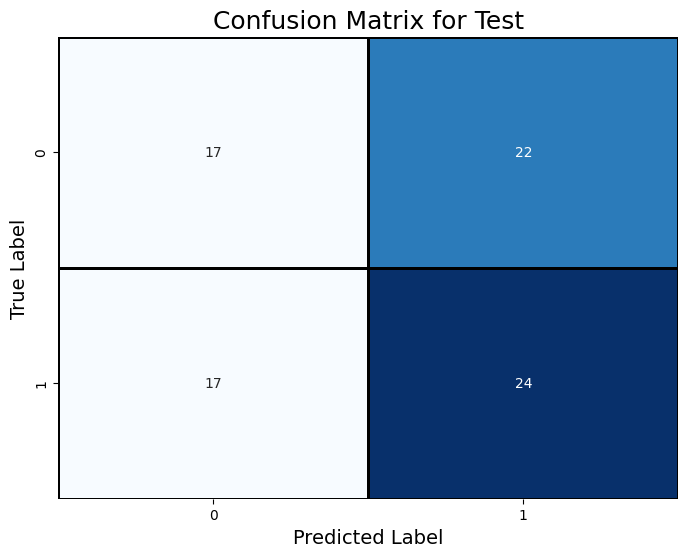

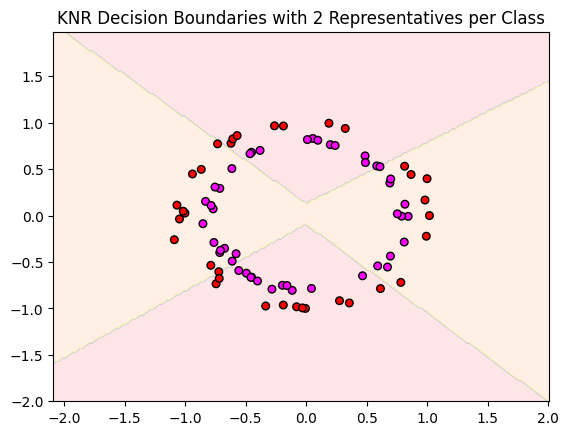

In [47]:


# KNR with 2 representatives per class
knr = KNRClassifier(m=2)
knr.train(X_train, y_train)
knr_prediction = knr.predict(X_test)

knr__metric= Metric(knr_prediction, y_test)
knr__metric.accuracy()
knr__metric.multi_class_confusion_matrix()
# knr__metric.display_confusion_matrix_table()
knr__metric.plot_confusion_matrix("Test")
knr.plot_decision_boundaries(X_test,y_test)

# knr__metric.multi_class_f1_Score(knr__metric.multi_class_confusion_matrix())

### Dataset 3

In [54]:
X_train=pd.read_csv("Team14/Dataset-3/train_data.csv")
y_train=pd.read_csv("Team14/Dataset-3/train_label.csv")
X_test=pd.read_csv("Team14/Dataset-3/test_data.csv")
y_test=pd.read_csv("Team14/Dataset-3/test_label.csv")

X_train=X_train.iloc[:,:].values
y_train=y_train.iloc[:,0].values
X_test=X_test.iloc[:,:].values
y_test=y_test.iloc[:,0].values

Accuracy of 46.07%


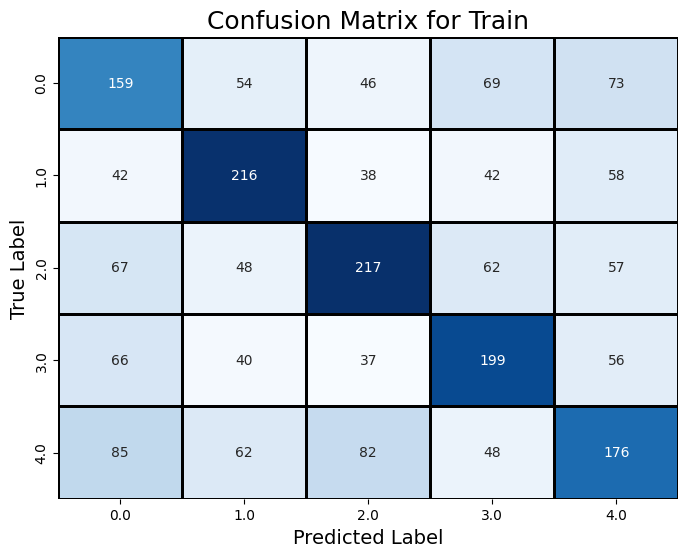

In [55]:


# KNR with 2 representatives per class
knr = KNRClassifier(m=2)
knr.train(X_train, y_train)
knr_prediction = knr.predict(X_train)

knr__metric= Metric(knr_prediction, y_train)
knr__metric.accuracy()
knr__metric.multi_class_confusion_matrix()
# knr__metric.display_confusion_matrix_table()
knr__metric.plot_confusion_matrix("Train")

# knr.plot_decision_boundaries(X_train,y_train)

# knr__metric.multi_class_f1_Score(knr__metric.multi_class_confusion_matrix())

Accuracy of 39.9%


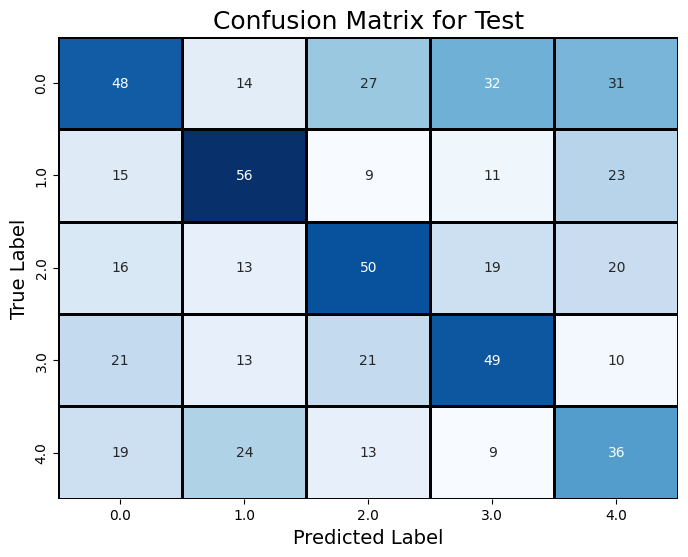

In [56]:


# KNR with 2 representatives per class
knr = KNRClassifier(m=2)
knr.train(X_train, y_train)
knr_prediction = knr.predict(X_test)

knr__metric= Metric(knr_prediction, y_test)
knr__metric.accuracy()
knr__metric.multi_class_confusion_matrix()
# knr__metric.display_confusion_matrix_table()
knr__metric.plot_confusion_matrix("Test")
#knr.plot_decision_boundaries(X_test,y_test)

# knr__metric.multi_class_f1_Score(knr__metric.multi_class_confusion_matrix())

# Bayes's Classifier

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.stats import multivariate_normal

# Helper function to calculate Gaussian likelihood
def gaussian_pdf(x, mean, cov):
    return multivariate_normal.pdf(x, mean=mean, cov=cov)

# Bayes classifier with Gaussian distribution for each class
class BayesClassifierGaussian:
    def __init__(self):
        self.classes = None
        self.means = None
        self.covs = None
        self.priors = None

    def fit(self, X, y):
        self.classes = np.unique(y)
        self.means = {}
        self.covs = {}
        self.priors = {}

        for cls in self.classes:
            X_cls = X[y == cls]
            self.means[cls] = np.mean(X_cls, axis=0)
            self.covs[cls] = np.cov(X_cls, rowvar=False)
            self.priors[cls] = len(X_cls) / len(X)

    def predict(self, X):
        posteriors = []
        for i in range(len(X)):
            posteriors_i = []
            for cls in self.classes:
                prior = np.log(self.priors[cls])
                likelihood = np.log(gaussian_pdf(X[i], self.means[cls], self.covs[cls]))
                posterior = prior + likelihood
                posteriors_i.append(posterior)
            posteriors.append(self.classes[np.argmax(posteriors_i)])
        return np.array(posteriors)
# Plot decision regions and level curves
# Function to plot decision regions
def plot_decision_regions(X, y, classifier, with_level_curves=True, resolution=0.02, title="Decision Region Plot"):
    # Define bounds of the plot
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))

    # Predict for each point in the meshgrid
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision region
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

    # Plot training data points
    markers = ('o', 's', '^')
    colors = ('blue', 'red', 'green')
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}')

    if with_level_curves:
        # Plot level curves (Gaussian distribution contours for each class)
        for cls in classifier.classes:
            mean = classifier.means[cls]
            cov = classifier.covs[cls] if hasattr(classifier, 'covs') else np.diag(classifier.vars[cls])
            rv = multivariate_normal(mean, cov)
            plt.contour(xx, yy, rv.pdf(np.dstack((xx, yy))), levels=5, colors=colors[int(cls)], alpha=0.8)

    plt.title(title)
    plt.legend()
    plt.show()

In [82]:
train_data=pd.read_csv("Team14/Dataset-1/train.csv")
test=pd.read_csv("Team14/Dataset-1/test.csv")

X_train=train_data.iloc[:,:-1].values
y_train=train_data.iloc[:,-1].values
X_test=test.iloc[:,:-1].values
y_test=test.iloc[:,-1].values

Accuracy of 98.333%


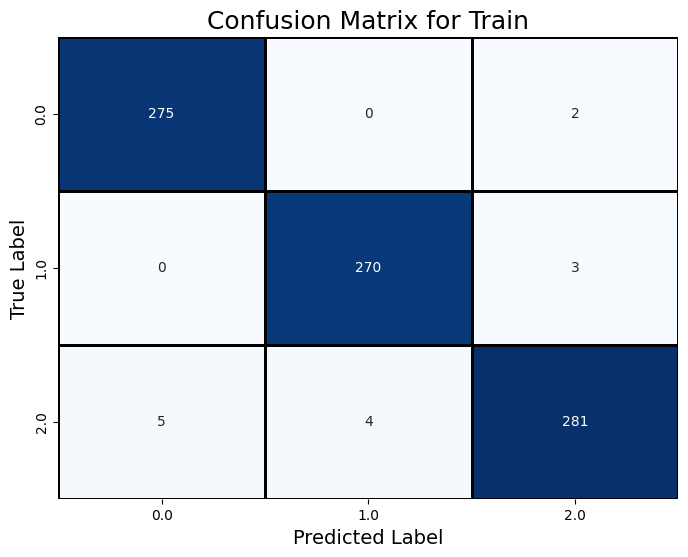

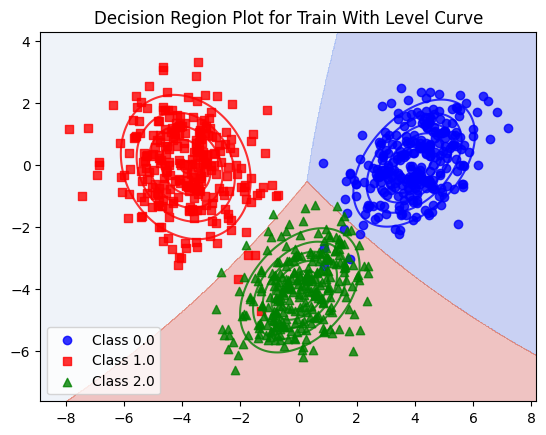

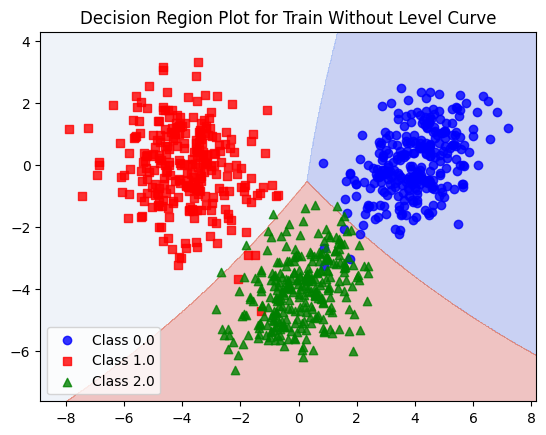

In [83]:

# Train Bayes Classifier
classifier = BayesClassifierGaussian()
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_train)

bayesian_metric= Metric(y_pred, y_train)
bayesian_metric.accuracy()
bayesian_metric.multi_class_confusion_matrix()
# knn_metric.display_confusion_matrix_table()
bayesian_metric.plot_confusion_matrix("Train")

# Plot decision regions and level curves
plot_decision_regions(X_train, y_train, classifier,True,0.02,"Decision Region Plot for Train With Level Curve")
plot_decision_regions(X_train, y_train, classifier,False,0.02,"Decision Region Plot for Train Without Level Curve")


Accuracy of 99.167%


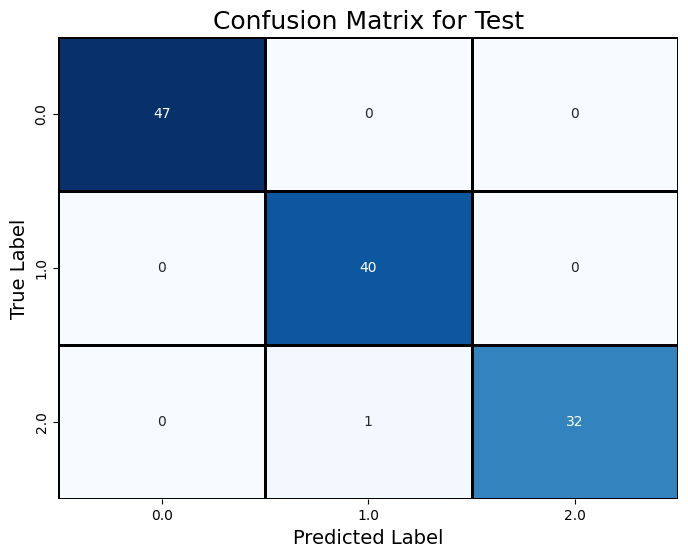

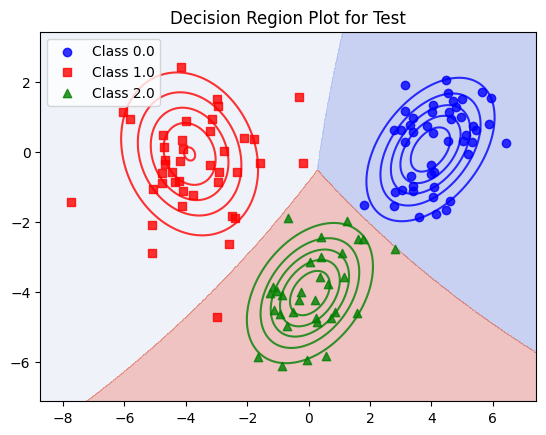

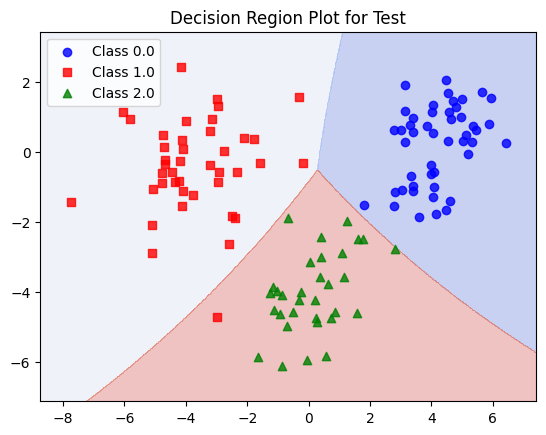

In [84]:

# Train Bayes Classifier
classifier = BayesClassifierGaussian()
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

bayesian_metric= Metric(y_pred, y_test)
bayesian_metric.accuracy()
bayesian_metric.multi_class_confusion_matrix()
# knn_metric.display_confusion_matrix_table()
bayesian_metric.plot_confusion_matrix("Test")

# Plot decision regions and level curves
plot_decision_regions(X_test, y_test, classifier,True,0.02,"Decision Region Plot for Test")
plot_decision_regions(X_test, y_test, classifier,False,0.02,"Decision Region Plot for Test")


## Dataset 2

In [85]:
train_data=pd.read_csv("Team14/Dataset-2/Train.csv")
test=pd.read_csv("Team14/Dataset-2/Test.csv")

X_train=train_data.iloc[:,:-1].values
y_train=train_data.iloc[:,-1].values
X_test=test.iloc[:,:-1].values
y_test=test.iloc[:,-1].values

Accuracy of 80.036%


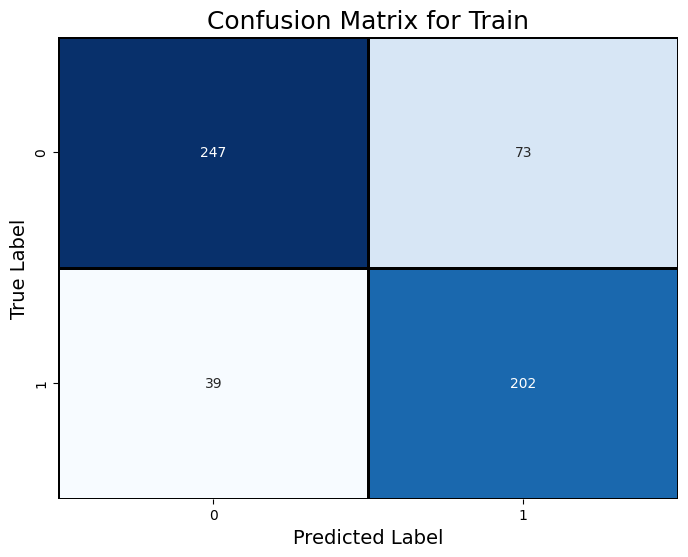

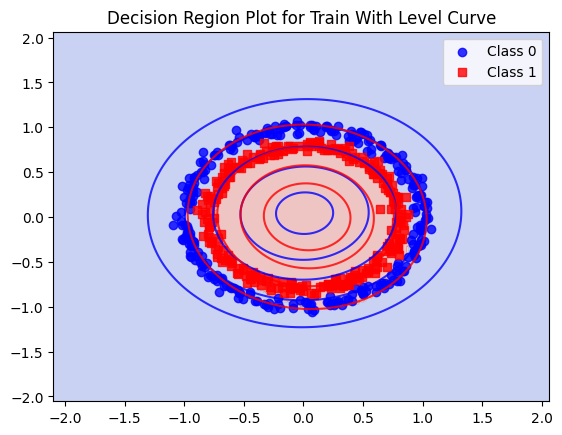

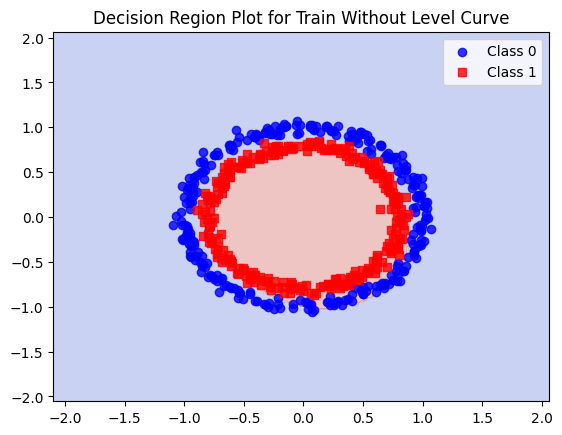

In [86]:

# Train Bayes Classifier
classifier = BayesClassifierGaussian()
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_train)

bayesian_metric= Metric(y_pred, y_train)
bayesian_metric.accuracy()
bayesian_metric.multi_class_confusion_matrix()
# knn_metric.display_confusion_matrix_table()
bayesian_metric.plot_confusion_matrix("Train")

# Plot decision regions and level curves
plot_decision_regions(X_train, y_train, classifier,True,0.02,"Decision Region Plot for Train With Level Curve")
plot_decision_regions(X_train, y_train, classifier,False,0.02,"Decision Region Plot for Train Without Level Curve")


Accuracy of 81.25%


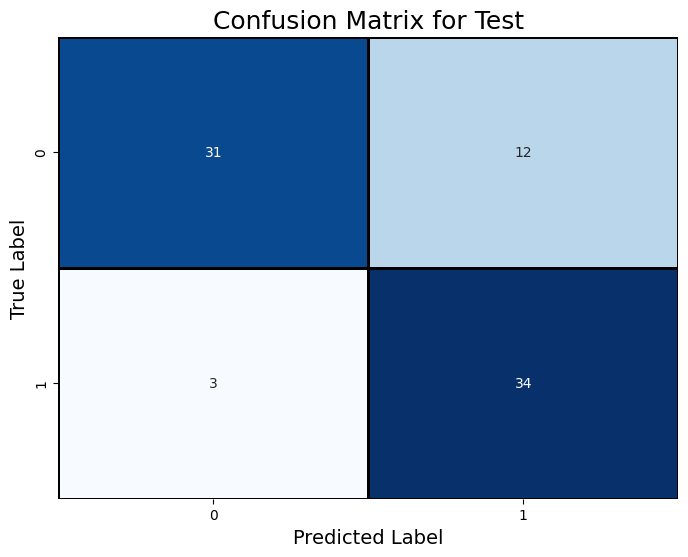

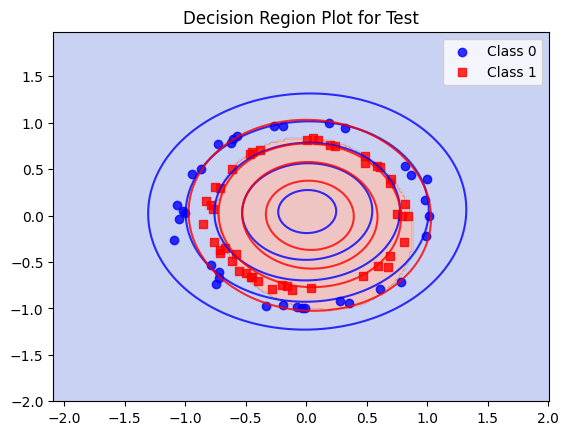

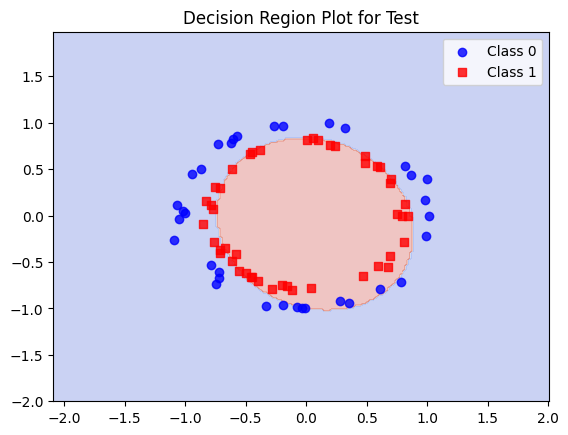

In [87]:

# Train Bayes Classifier
classifier = BayesClassifierGaussian()
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

bayesian_metric= Metric(y_pred, y_test)
bayesian_metric.accuracy()
bayesian_metric.multi_class_confusion_matrix()
# knn_metric.display_confusion_matrix_table()
bayesian_metric.plot_confusion_matrix("Test")

# Plot decision regions and level curves
plot_decision_regions(X_test, y_test, classifier,True,0.02,"Decision Region Plot for Test")
plot_decision_regions(X_test, y_test, classifier,False,0.02,"Decision Region Plot for Test")


## Dataset 3

In [64]:
X_train=pd.read_csv("Team14/Dataset-3/train_data.csv")
y_train=pd.read_csv("Team14/Dataset-3/train_label.csv")
X_test=pd.read_csv("Team14/Dataset-3/test_data.csv")
y_test=pd.read_csv("Team14/Dataset-3/test_label.csv")

X_train=X_train.iloc[:,:].values
y_train=y_train.iloc[:,0].values
X_test=X_test.iloc[:,:].values
y_test=y_test.iloc[:,0].values

Accuracy of 71.891%


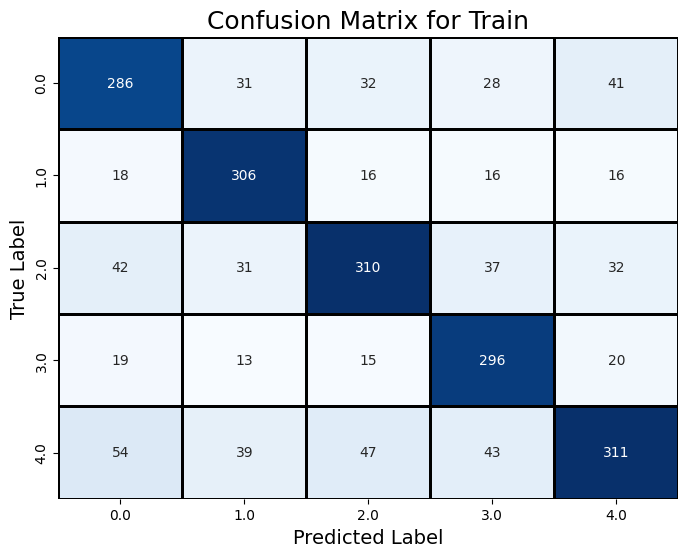

In [66]:

# Train Bayes Classifier
classifier = BayesClassifierGaussian()
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_train)

bayesian_metric= Metric(y_pred, y_train)
bayesian_metric.accuracy()
bayesian_metric.multi_class_confusion_matrix()
# knn_metric.display_confusion_matrix_table()
bayesian_metric.plot_confusion_matrix("Train")

# # Plot decision regions and level curves
# plot_decision_regions(X_train, y_train, classifier,True,0.2,"Decision Region Plot for Train With Level Curve")
# plot_decision_regions(X_train, y_train, classifier,False,0.2,"Decision Region Plot for Train Without Level Curve")


Accuracy of 50.584%


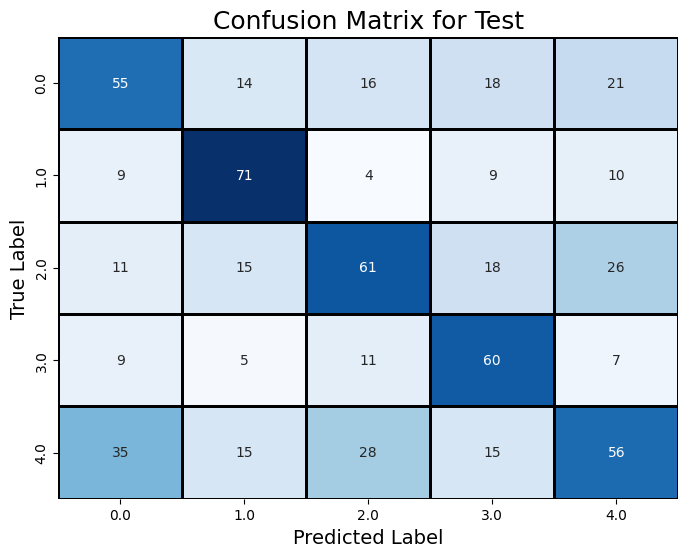

In [67]:

# Train Bayes Classifier
classifier = BayesClassifierGaussian()
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

bayesian_metric= Metric(y_pred, y_test)
bayesian_metric.accuracy()
bayesian_metric.multi_class_confusion_matrix()
# knn_metric.display_confusion_matrix_table()
bayesian_metric.plot_confusion_matrix("Test")

# # Plot decision regions and level curves
# plot_decision_regions(X_test, y_test, classifier,True,0.2,"Decision Region Plot for Test")
# plot_decision_regions(X_test, y_test, classifier,False,0.2,"Decision Region Plot for Test")


# Naive Bayes Classification

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.stats import norm

# Naive Bayes classifier with Gaussian distribution for each feature
class NaiveBayesGaussian:
    def __init__(self):
        self.classes = None
        self.means = None
        self.vars = None
        self.priors = None

    def fit(self, X, y):
        self.classes = np.unique(y)
        self.means = {}
        self.vars = {}
        self.priors = {}

        for cls in self.classes:
            X_cls = X[y == cls]
            self.means[cls] = np.mean(X_cls, axis=0)
            self.vars[cls] = np.var(X_cls, axis=0)
            self.priors[cls] = len(X_cls) / len(X)

    def gaussian_pdf(self, x, mean, var):
        """Calculate the Gaussian probability density function for a feature."""
        return norm.pdf(x, mean, np.sqrt(var))

    def predict(self, X):
        posteriors = []
        for i in range(len(X)):
            posteriors_i = []
            for cls in self.classes:
                prior = np.log(self.priors[cls])
                likelihood = np.sum(np.log(self.gaussian_pdf(X[i], self.means[cls], self.vars[cls])))
                posterior = prior + likelihood
                posteriors_i.append(posterior)
            posteriors.append(self.classes[np.argmax(posteriors_i)])
        return np.array(posteriors)

# Plot decision regions and level curves
# Function to plot decision regions
def plot_decision_regions(X, y, classifier, with_level_curves=True, resolution=0.02, title="Decision Region Plot"):
    # Define bounds of the plot
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))

    # Predict for each point in the meshgrid
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision region
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

    # Plot training data points
    markers = ('o', 's', '^')
    colors = ('blue', 'red', 'green')
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}')

    if with_level_curves:
        # Plot level curves (Gaussian distribution contours for each class)
        for cls in classifier.classes:
            mean = classifier.means[cls]
            cov = classifier.covs[cls] if hasattr(classifier, 'covs') else np.diag(classifier.vars[cls])
            rv = multivariate_normal(mean, cov)
            plt.contour(xx, yy, rv.pdf(np.dstack((xx, yy))), levels=5, colors=colors[int(cls)], alpha=0.8)

    plt.title(title)
    plt.legend()
    plt.show()


In [72]:
train_data=pd.read_csv("Team14/Dataset-1/train.csv")
test=pd.read_csv("Team14/Dataset-1/test.csv")

X_train=train_data.iloc[:,:-1].values
y_train=train_data.iloc[:,-1].values
X_test=test.iloc[:,:-1].values
y_test=test.iloc[:,-1].values

Accuracy of 98.81%


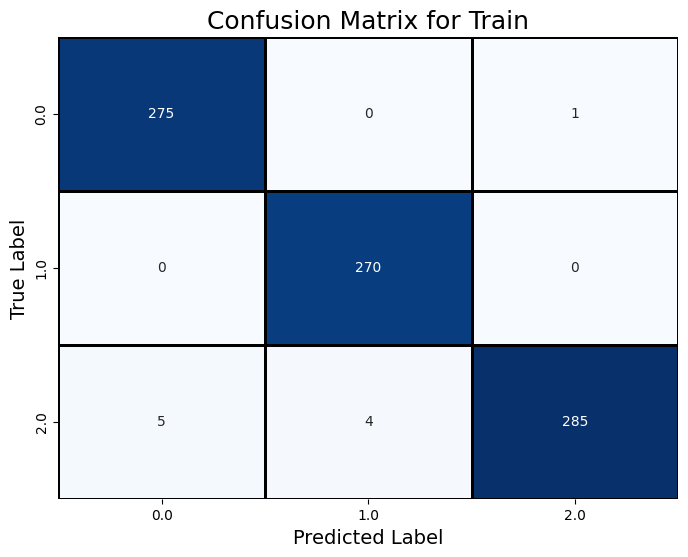

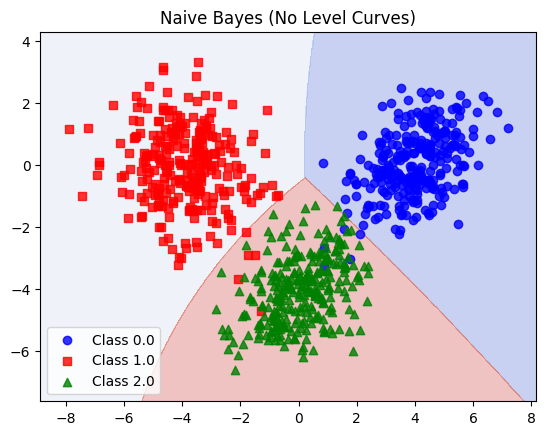

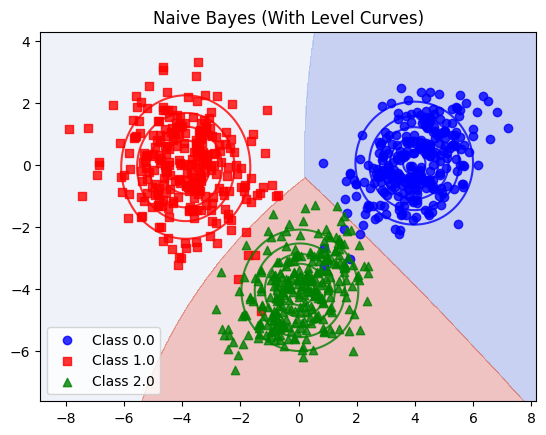

In [73]:

# Train and plot for Naive Bayes Classifier
naive_classifier = NaiveBayesGaussian()
naive_classifier.fit(X_train, y_train)

y_pred=naive_classifier.predict(X_train)
naive_metric= Metric(y_pred, y_train)
naive_metric.accuracy()
naive_metric.multi_class_confusion_matrix()
# knn_metric.display_confusion_matrix_table()
naive_metric.plot_confusion_matrix("Train")


# Without level curves
plot_decision_regions(X_train, y_train, naive_classifier, with_level_curves=False, title="Naive Bayes (No Level Curves)")

# With level curves
plot_decision_regions(X_train, y_train, naive_classifier, with_level_curves=True, title="Naive Bayes (With Level Curves)")


Accuracy of 99.167%


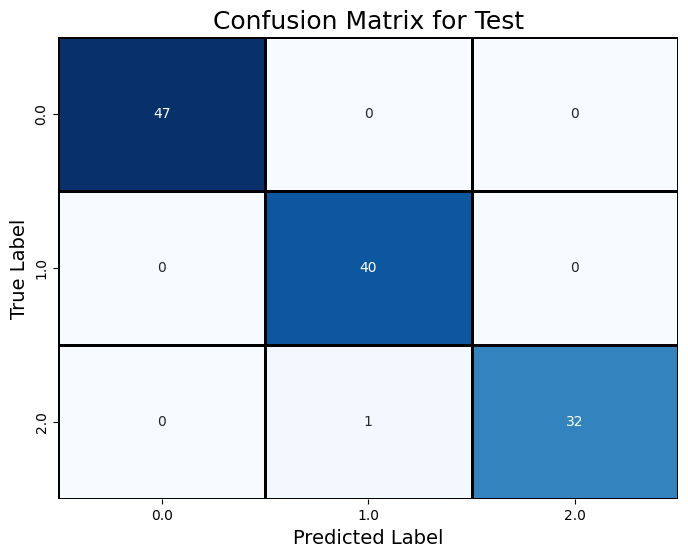

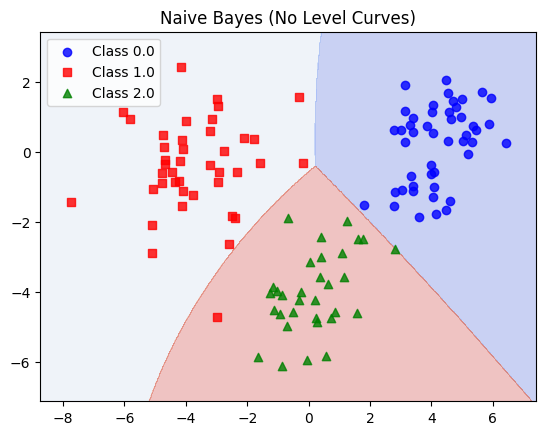

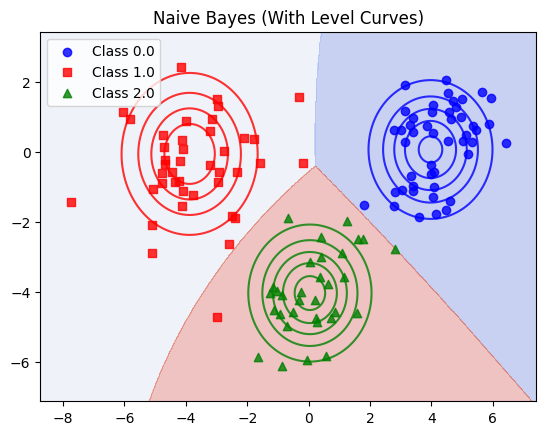

In [74]:

# Train and plot for Naive Bayes Classifier
naive_classifier = NaiveBayesGaussian()
naive_classifier.fit(X_train, y_train)

y_pred=naive_classifier.predict(X_test)
naive_metric= Metric(y_pred, y_test)
naive_metric.accuracy()
naive_metric.multi_class_confusion_matrix()
# knn_metric.display_confusion_matrix_table()
naive_metric.plot_confusion_matrix("Test")


# Without level curves
plot_decision_regions(X_test, y_test, naive_classifier, with_level_curves=False, title="Naive Bayes (No Level Curves)")

# With level curves
plot_decision_regions(X_test, y_test, naive_classifier, with_level_curves=True, title="Naive Bayes (With Level Curves)")


## Dataset 2

In [75]:
train_data=pd.read_csv("Team14/Dataset-2/Train.csv")
test=pd.read_csv("Team14/Dataset-2/Test.csv")

X_train=train_data.iloc[:,:-1].values
y_train=train_data.iloc[:,-1].values
X_test=test.iloc[:,:-1].values
y_test=test.iloc[:,-1].values

Accuracy of 82.888%


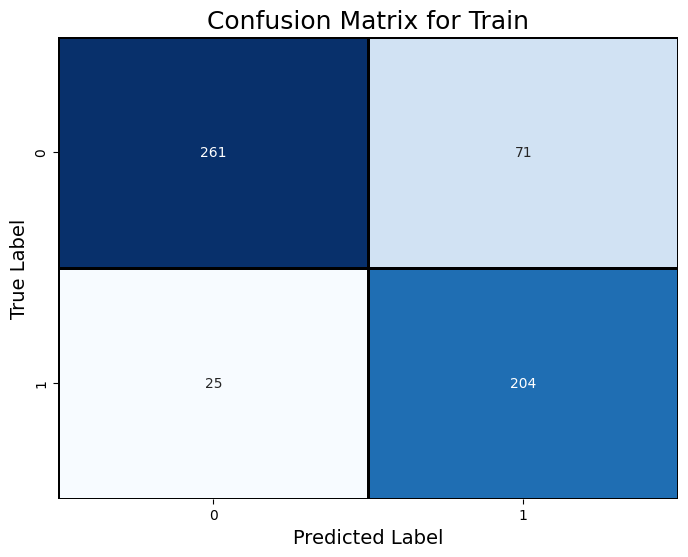

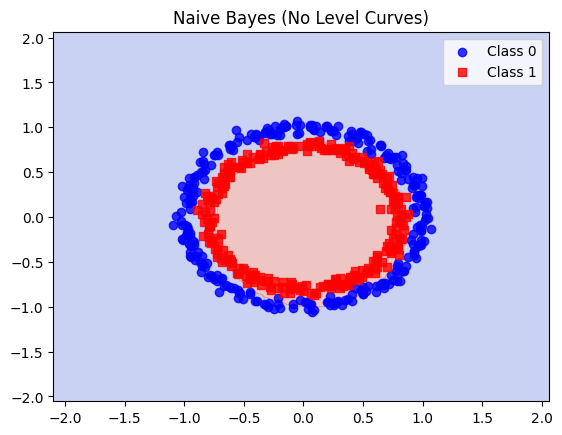

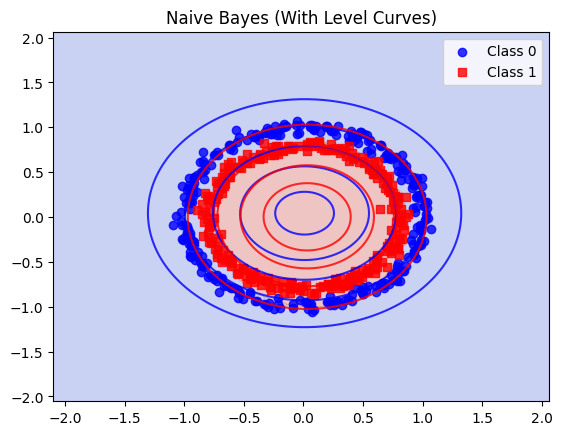

In [76]:

# Train and plot for Naive Bayes Classifier
naive_classifier = NaiveBayesGaussian()
naive_classifier.fit(X_train, y_train)

y_pred=naive_classifier.predict(X_train)
naive_metric= Metric(y_pred, y_train)
naive_metric.accuracy()
naive_metric.multi_class_confusion_matrix()
# knn_metric.display_confusion_matrix_table()
naive_metric.plot_confusion_matrix("Train")


# Without level curves
plot_decision_regions(X_train, y_train, naive_classifier, with_level_curves=False, title="Naive Bayes (No Level Curves)")

# With level curves
plot_decision_regions(X_train, y_train, naive_classifier, with_level_curves=True, title="Naive Bayes (With Level Curves)")


Accuracy of 77.5%


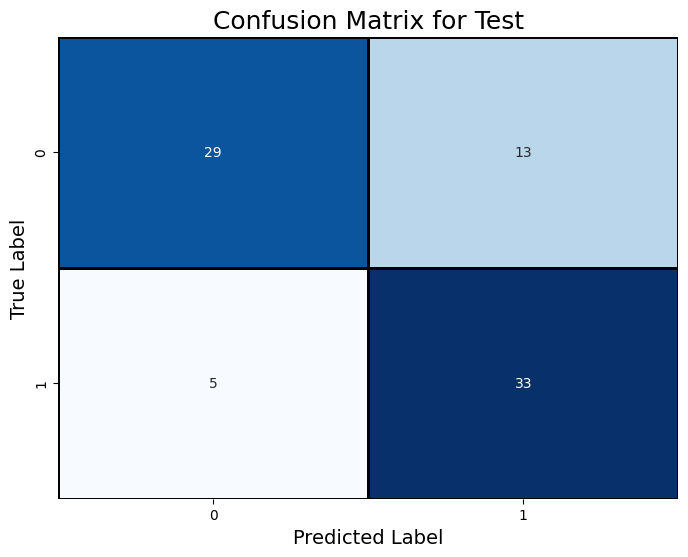

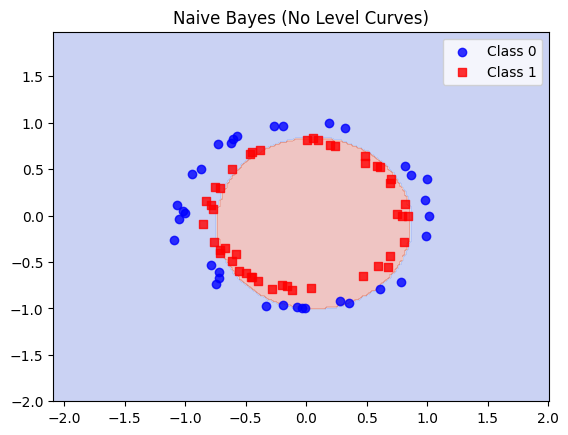

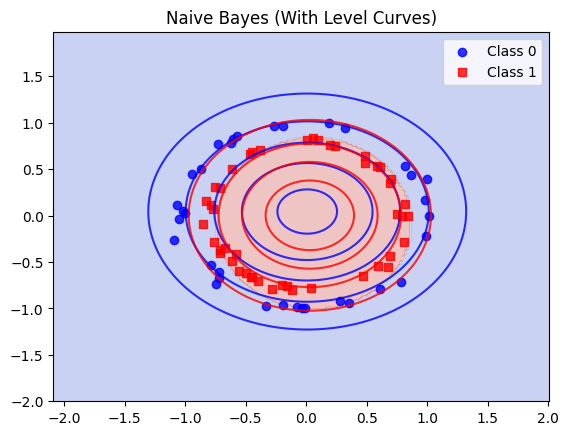

In [77]:

# Train and plot for Naive Bayes Classifier
naive_classifier = NaiveBayesGaussian()
naive_classifier.fit(X_train, y_train)

y_pred=naive_classifier.predict(X_test)
naive_metric= Metric(y_pred, y_test)
naive_metric.accuracy()
naive_metric.multi_class_confusion_matrix()
# knn_metric.display_confusion_matrix_table()
naive_metric.plot_confusion_matrix("Test")


# Without level curves
plot_decision_regions(X_test, y_test, naive_classifier, with_level_curves=False, title="Naive Bayes (No Level Curves)")

# With level curves
plot_decision_regions(X_test, y_test, naive_classifier, with_level_curves=True, title="Naive Bayes (With Level Curves)")


## Dataset 3

In [78]:
X_train=pd.read_csv("Team14/Dataset-3/train_data.csv")
y_train=pd.read_csv("Team14/Dataset-3/train_label.csv")
X_test=pd.read_csv("Team14/Dataset-3/test_data.csv")
y_test=pd.read_csv("Team14/Dataset-3/test_label.csv")

X_train=X_train.iloc[:,:].values
y_train=y_train.iloc[:,0].values
X_test=X_test.iloc[:,:].values
y_test=y_test.iloc[:,0].values

Accuracy of 47.689%


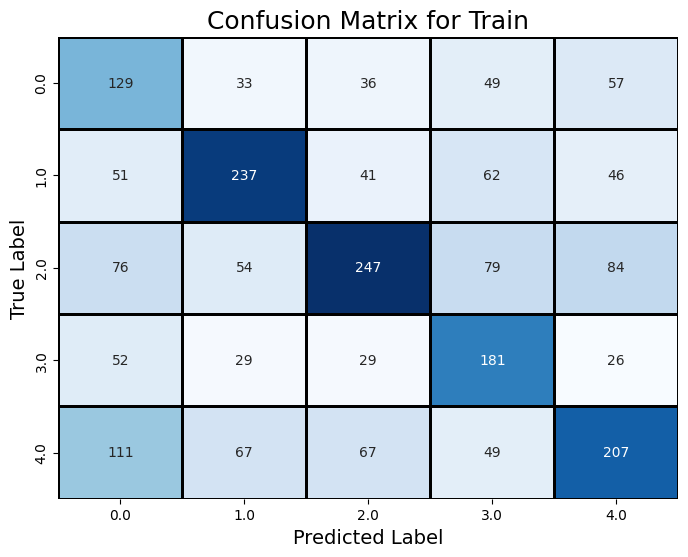

In [79]:

# Train and plot for Naive Bayes Classifier
naive_classifier = NaiveBayesGaussian()
naive_classifier.fit(X_train, y_train)

y_pred=naive_classifier.predict(X_train)
naive_metric= Metric(y_pred, y_train)
naive_metric.accuracy()
naive_metric.multi_class_confusion_matrix()
# knn_metric.display_confusion_matrix_table()
naive_metric.plot_confusion_matrix("Train")


# # Without level curves
# plot_decision_regions(X_train, y_train, naive_classifier, with_level_curves=False, title="Naive Bayes (No Level Curves)")

# # With level curves
# plot_decision_regions(X_train, y_train, naive_classifier, with_level_curves=True, title="Naive Bayes (With Level Curves)")


Accuracy of 49.416%


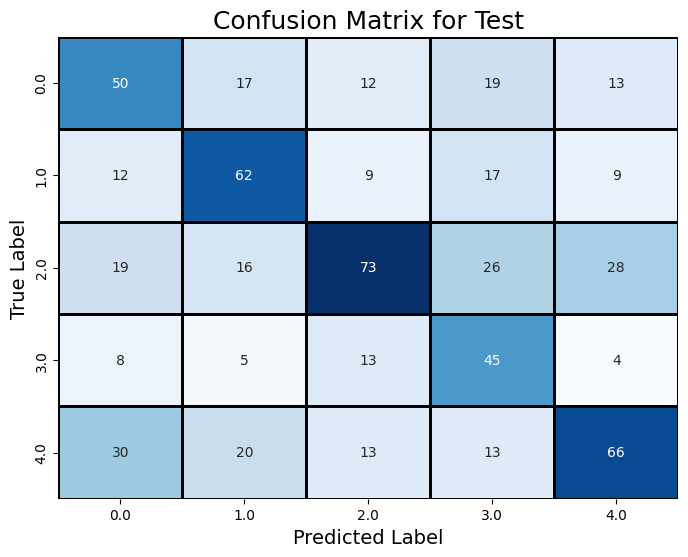

In [80]:

# Train and plot for Naive Bayes Classifier
naive_classifier = NaiveBayesGaussian()
naive_classifier.fit(X_train, y_train)

y_pred=naive_classifier.predict(X_test)
naive_metric= Metric(y_pred, y_test)
naive_metric.accuracy()
naive_metric.multi_class_confusion_matrix()
# knn_metric.display_confusion_matrix_table()
naive_metric.plot_confusion_matrix("Test")


# # Without level curves
# plot_decision_regions(X_test, y_test, naive_classifier, with_level_curves=False, title="Naive Bayes (No Level Curves)")

# # With level curves
# plot_decision_regions(X_test, y_test, naive_classifier, with_level_curves=True, title="Naive Bayes (With Level Curves)")


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import accuracy_score, confusion_matrix
# from scipy.stats import norm

# # Naive Bayes classifier with Gaussian distribution for each feature
# class NaiveBayesGaussian:
#     def __init__(self):
#         self.classes = None
#         self.means = None
#         self.vars = None
#         self.priors = None

#     def fit(self, X, y):
#         self.classes = np.unique(y)
#         self.means = {}
#         self.vars = {}
#         self.priors = {}

#         for cls in self.classes:
#             X_cls = X[y == cls]
#             self.means[cls] = np.mean(X_cls, axis=0)
#             self.vars[cls] = np.var(X_cls, axis=0)
#             self.priors[cls] = len(X_cls) / len(X)

#     def gaussian_pdf(self, x, mean, var):
#         """Calculate the Gaussian probability density function for a feature."""
#         return norm.pdf(x, mean, np.sqrt(var))

#     def predict(self, X):
#         posteriors = []
#         for i in range(len(X)):
#             posteriors_i = []
#             for cls in self.classes:
#                 prior = np.log(self.priors[cls])
#                 likelihood = np.sum(np.log(self.gaussian_pdf(X[i], self.means[cls], self.vars[cls])))
#                 posterior = prior + likelihood
#                 posteriors_i.append(posterior)
#             posteriors.append(self.classes[np.argmax(posteriors_i)])
#         return np.array(posteriors)

# # Plot decision regions and level curves
# def plot_decision_regions(X, y, classifier, resolution=0.02):
#     # Define bounds of the plot
#     x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
#                          np.arange(y_min, y_max, resolution))

#     # Predict for each point in the meshgrid
#     Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)

#     # Plot decision region
#     plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

#     # Plot training data points
#     markers = ('o', 's', '^', 'x')  # Support for up to 4 classes
#     colors = ('blue', 'red', 'green', 'purple')  # Support for up to 4 classes
#     for idx, cl in enumerate(np.unique(y)):
#         plt.scatter(x=X[y == cl, 0],
#                     y=X[y == cl, 1],
#                     alpha=0.8,
#                     c=colors[idx],
#                     marker=markers[idx],
#                     label=f'Class {cl}')

#     plt.legend()
#     plt.show()

# # Main function to run everything
# if __name__ == "__main__":
#     # Generate synthetic 2D data
#     X, y = X_train, y_train

#     # Train Naive Bayes Classifier
#     classifier = NaiveBayesGaussian()
#     classifier.fit(X, y)

#     # Make predictions
#     y_pred = classifier.predict(X_test)

#     # Performance evaluation
#     accuracy = accuracy_score(y_test, y_pred)
#     cm = confusion_matrix(y_test, y_pred)
#     print(f"Classification Accuracy: {accuracy * 100:.2f}%")
#     print(f"Confusion Matrix:\n{cm}")

#     # Plot decision regions and level curves
#     plot_decision_regions(X_train, y_train, classifier)


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import accuracy_score, confusion_matrix
# from scipy.stats import norm
# from sklearn.model_selection import train_test_split

# # Naive Bayes classifier with Gaussian distribution for each feature
# class NaiveBayesGaussian:
#     def __init__(self):
#         self.classes = None
#         self.means = None
#         self.vars = None
#         self.priors = None

#     def fit(self, X, y):
#         self.classes = np.unique(y)
#         self.means = {}
#         self.vars = {}
#         self.priors = {}

#         for cls in self.classes:
#             X_cls = X[y == cls]
#             self.means[cls] = np.mean(X_cls, axis=0)
#             self.vars[cls] = np.var(X_cls, axis=0)
#             self.priors[cls] = len(X_cls) / len(X)

#     def gaussian_pdf(self, x, mean, var):
#         """Calculate the Gaussian probability density function for a feature."""
#         return norm.pdf(x, mean, np.sqrt(var))

#     def predict(self, X):
#         posteriors = []
#         for i in range(len(X)):
#             posteriors_i = []
#             for cls in self.classes:
#                 prior = np.log(self.priors[cls])
#                 likelihood = np.sum(np.log(self.gaussian_pdf(X[i], self.means[cls], self.vars[cls])))
#                 posterior = prior + likelihood
#                 posteriors_i.append(posterior)
#             posteriors.append(self.classes[np.argmax(posteriors_i)])
#         return np.array(posteriors)


# # Plot decision regions, training data and level curves
# def plot_decision_regions(X, y, classifier, resolution=0.02):
#     # Define bounds of the plot
#     x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
#                          np.arange(y_min, y_max, resolution))

#     # Predict for each point in the meshgrid
#     Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)

#     # Plot decision region
#     plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

#     # Plot training data points
#     markers = ('o', 's')
#     colors = ('blue', 'red')
#     for idx, cl in enumerate(np.unique(y)):
#         plt.scatter(x=X[y == cl, 0],
#                     y=X[y == cl, 1],
#                     alpha=0.8,
#                     c=colors[idx],
#                     marker=markers[idx],
#                     label=f'Class {cl}')

#     # Plot level curves (Gaussian distribution contours for each feature of each class)
#     x_values = np.linspace(x_min, x_max, 100)
#     y_values = np.linspace(y_min, y_max, 100)
#     for cls in classifier.classes:
#         # Feature 1
#         mean1, var1 = classifier.means[cls][0], classifier.vars[cls][0]
#         # Convert cls to integer for indexing the colors tuple
#         plt.plot(x_values, norm.pdf(x_values, mean1, np.sqrt(var1)), color=colors[int(cls)], linestyle='dashed', label=f'Class {int(cls)} - Feature 1')

#         # Feature 2
#         mean2, var2 = classifier.means[cls][1], classifier.vars[cls][1]
#         # Convert cls to integer for indexing the colors tuple
#         plt.plot(y_values, norm.pdf(y_values, mean2, np.sqrt(var2)), color=colors[int(cls)], linestyle='dotted', label=f'Class {int(cls)} - Feature 2')

#     plt.legend()
#     plt.show()

# # Main function to run everything
# if __name__ == "__main__":
#     # Generate synthetic 2D data
#     X, y = X_train,y_train

#     # Train Naive Bayes Classifier
#     classifier = NaiveBayesGaussian()
#     classifier.fit(X, y)

#     # Make predictions
#     y_pred = classifier.predict(X)

#     # Performance evaluation
#     accuracy = accuracy_score(y, y_pred)
#     cm = confusion_matrix(y, y_pred)
#     print(f"Classification Accuracy: {accuracy * 100:.2f}%")
#     print(f"Confusion Matrix:\n{cm}")

#     # Plot decision regions and level curves
#     plot_decision_regions(X, y, classifier)
